# Compute performance metrics for the given Y and Y_prediction

In [0]:
import numpy as np
import pandas as pd
# other than these two you should not import any other packages

In [0]:
data_matrix = pd.read_csv("5_a.csv");
#print(data_matrix.head(10))
#print(data_matrix.shape)
#print(data_matrix.size)

pred_matrix = data_matrix.loc[:,['y','proba']]
#pos_data = pred_matrix.loc[pred_matrix['proba'] > 0.5 ]
#print(pos_data.shape)
#print(pos_data.head(3))

pred_matrix['proba'] = [ 0.0 if x < 0.5  else 1.0 for x in pred_matrix['proba']]
#print(pred_matrix.shape)
#print(pred_matrix.head(3))

In [0]:


def compute_confusion_matrix(pred_matrix_data, column_name):

  confusion_matrix = {'TP': 0, 'FP' : 0, 'FN':0 , 'TN': 0}

  true_posi , false_posi , true_nega , flase_nega = 0,0,0,0

  for i in pred_matrix_data.index:
      y = pred_matrix_data.at[i, "y"]
      y_prob = pred_matrix_data.at[i, column_name]
      if y==1 and y_prob==1 :
        true_posi = (true_posi + 1);
      elif y==0 and y_prob == 1 :
        false_posi = (false_posi + 1);
      elif y==1 and y_prob == 0 :
        flase_nega = (flase_nega + 1);
      elif y==0 and y_prob == 0 :
        true_nega = (true_nega + 1);

  confusion_matrix['TP'] = true_posi
  confusion_matrix['FP'] = false_posi
  confusion_matrix['FN'] = flase_nega
  confusion_matrix['TN'] = true_nega

  return confusion_matrix;

def compute_precision(con_matrix):
  return ( con_matrix['TP'] / ( con_matrix['TP'] + con_matrix['FP'] ) );

def compute_recall(con_matrix):
  return ( con_matrix['TP'] / ( con_matrix['TP'] + con_matrix['FN'] ) );

def compute_F1_score(con_matrix):
  prec = compute_precision( con_matrix );
  recal = compute_recall(con_matrix);
  return ( 2 * ( (prec * recal) / (prec + recal) ) );

def compute_accuracy_score(con_matrix):
  return (( con_matrix['TP'] + con_matrix['TN']) / (con_matrix['TP'] + con_matrix['FP'] + con_matrix['FN'] + con_matrix['TN'] ))


def compute_fpr(con_matrix):
  return ( con_matrix['FP'] / ( con_matrix['FP'] + con_matrix['TN'] ) );

# confu_matrix_ls is list of confusion matrices of All Thresold values
def tpr_fpr_compute( confu_matrix_ls ):
  tpr_list = []
  fpr_list = []
  for con_matrix in confu_matrix_ls:
    tpr_v = compute_recall( list(con_matrix.values())[0] );
    fpr_v = compute_fpr( list(con_matrix.values())[0] );
   
    tpr_list.append(tpr_v)
    fpr_list.append(fpr_v)
  return tpr_list , fpr_list ;


In [21]:
conf_matrix = compute_confusion_matrix(pred_matrix , 'proba');
F1_score = compute_F1_score(conf_matrix);
print("confusion matrix :")
print(conf_matrix)
print("F1_score")
print(F1_score)

confusion matrix :
{'TP': 10000, 'FP': 100, 'FN': 0, 'TN': 0}
F1_score
0.9950248756218906


In [0]:
thresold_unique_val = set( [ x for x in data_matrix['proba']] );
#print(len(list(set(thresold_unique_val))))
thresold_unique_val = sorted(list(thresold_unique_val), reverse=True)
#data_matrix.head(5)
# Here , Y-scores are computed by their thresold values
for thresold in thresold_unique_val:
  each_thresold_y = []
  for y_score in data_matrix['proba']:
    if y_score < thresold :
      each_thresold_y.append(0)
    else :
      each_thresold_y.append(1)
  
  pred_matrix[thresold] = each_thresold_y

In [0]:
#print(pred_matrix.shape)
#pred_matrix.head(3)

In [0]:
confu_matrix_l = []
#confusion_matrices are computed as per their thresold values
for thresold in thresold_unique_val:
  confu_matrix_l.append( { thresold : compute_confusion_matrix( pred_matrix.loc[:,['y',thresold]] , thresold ) } ) ;

In [9]:
#pred_matrix_1 = pred_matrix.loc[:,['y','proba']]
#pred_matrix_1.head(5)
#print(list(confu_matrix_l[0].values())[0])

tpr_ls , fpr_ls = tpr_fpr_compute( confu_matrix_l );

auc = np.trapz( tpr_ls  , fpr_ls  )
print("AUC score :")
print(auc)


AUC score :
0.48829900000000004


In [0]:
accuracy_score_ = compute_accuracy_score(conf_matrix)
print( "accuracy_score :" )
print( accuracy_score_ )

accuracy_score :
0.9900990099009901


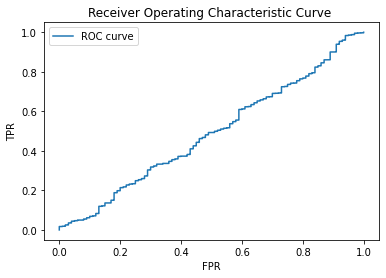

In [10]:
import matplotlib.pyplot as plt

plt.plot( np.asarray(fpr_ls ) , np.asarray(tpr_ls ) , label='ROC curve')
 
plt.title('Receiver Operating Characteristic Curve ')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()

In [0]:
# write your code
data_matrix_b = pd.read_csv("5_b.csv");

#print(data_matrix_b.shape)

pred_matrix_b = data_matrix_b.loc[:,['y','proba']]

pred_matrix_b['proba'] = [ 0.0 if y_pre < 0.5  else 1.0 for y_pre in pred_matrix_b['proba']]
#print(pred_matrix_b.shape)
#pred_matrix_b.head(5)

In [0]:
conf_matrix_b = compute_confusion_matrix(pred_matrix_b , 'proba');
print( "confusion matrix :" )
print( conf_matrix_b )
F1_score = compute_F1_score(conf_matrix_b);
print("F1_score")
print(F1_score)

confusion matrix :
{'TP': 55, 'FP': 239, 'FN': 45, 'TN': 9761}
F1_score
0.2791878172588833


In [0]:
thresold_unique_val = set( [ x for x in data_matrix_b['proba']] );
# print(len(list(set(thresold_unique_val))))
thresold_unique_val = sorted(list(thresold_unique_val), reverse=True)
#data_matrix.head(5)
# Here , Y-scores are computed by their thresold values
for thresold in thresold_unique_val:
  each_thresold_y = []
  for y_score in data_matrix_b['proba']:
    if y_score < thresold :
      each_thresold_y.append(0)
    else :
      each_thresold_y.append(1)
  
  pred_matrix_b[thresold] = each_thresold_y

In [0]:
confu_matrix_thresold = []
#confusion_matrices are computed as per their thresold values
for thresold in thresold_unique_val:
  confu_matrix_thresold.append( { thresold : compute_confusion_matrix( pred_matrix_b.loc[:,['y',thresold]] , thresold ) } ) ;


In [18]:
tpr_ls , fpr_ls = tpr_fpr_compute( confu_matrix_thresold );

auc = np.trapz( np.asarray(tpr_ls ) , np.asarray(fpr_ls ) )
print("AUC score :")
print(auc)

AUC score :
0.9377570000000001


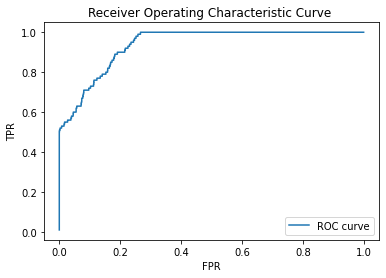

In [19]:
import matplotlib.pyplot as plt

plt.plot( np.asarray(fpr_ls ) , np.asarray(tpr_ls ) , label='ROC curve')
 
plt.title('Receiver Operating Characteristic Curve ')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()

In [0]:
accuracy_score_b = compute_accuracy_score(conf_matrix_b)
print( "accuracy_score :")
print( accuracy_score_b )

accuracy_score :
0.9718811881188119


In [0]:
 # write your code
data_matrix_c = pd.read_csv("5_c.csv");

#print(data_matrix_c.shape)
#print(data_matrix_c.head(3))

pred_matrix_c = data_matrix_c.loc[:,['y','prob']]

pred_matrix_c['prob'] = [ 0 if y_pre < 0.5  else 1 for y_pre in pred_matrix_c['prob']]
#print(pred_matrix_c.shape)

In [0]:
thresold_unique_val = set( [ x for x in data_matrix_c['prob']] );
#print(len(list(set(thresold_unique_val))))
thresold_unique_val = sorted(list(thresold_unique_val), reverse=True)
#data_matrix.head(5)
# Here , Y-scores are computed by their thresold values
for thresold in thresold_unique_val:
  each_thresold_y = []
  for y_score in data_matrix_c['prob']:
    if y_score < thresold :
      each_thresold_y.append(0)
    else :
      each_thresold_y.append(1)
  
  pred_matrix_c[thresold] = each_thresold_y

In [0]:
confu_matrix_lc = []
#confusion_matrices are computed as per their thresold values
for thresold in thresold_unique_val:
  confu_matrix_lc.append( { thresold : compute_confusion_matrix( pred_matrix_c.loc[:,['y',thresold]] , thresold ) } ) ;

In [0]:
from operator import itemgetter

# A=500×number of false negative+100×numebr of false positive

matrix_A = []

for each_conf_matrix in confu_matrix_lc:
  keey = list( each_conf_matrix.keys())
  velue = list( each_conf_matrix.values())
  each_val = ( 500 * velue[0]['FN'] ) + ( 100 * velue[0]['FP'] )

  matrix_A.append( { "thresold" : keey[0] , "FN_FP" : each_val })

list_of_thresold = sorted( matrix_A, key=itemgetter('FN_FP') );


In [0]:
print("Best Thresold value for computed matrix_A")
print( list_of_thresold[0]['thresold'])

Best Thresold value for computed matrix_A
0.2300390278970873


In [0]:
data_matrix_d = pd.read_csv("5_d.csv");

#print(data_matrix_d.shape)
#print(data_matrix_d.head(3))

pred_matrix_d = data_matrix_d.loc[:,['y','pred']]
#print(data_matrix_d.head(3))
#print(pred_matrix_d.shape)

In [0]:

def compute_Mean_Square_Error(pred_matrix_d):
  sum_of_y_2 = 0 
  n = 0
  for i in pred_matrix_d.index:
        n = i
        y = pred_matrix_d.at[i, "y"]
        ypred = pred_matrix_d.at[i, "pred"]
        y_square = (( y - ypred)**2)
        sum_of_y_2 = (sum_of_y_2 + y_square)

  totalcell = pred_matrix_d.shape
  n = totalcell[0]
  return ( sum_of_y_2 / n );

mean_sq_error = compute_Mean_Square_Error(pred_matrix_d)
print("Mean Square Error :")
print(mean_sq_error)

Mean Square Error :
177.16569974554707


In [13]:
def compute_MAPE(pred_matrix_d , sum_of_all_y ):
  sum_of_y_error = 0 

  for i in pred_matrix_d.index:
        
        y = pred_matrix_d.at[i, "y"]
        ypred = pred_matrix_d.at[i, "pred"]

        #y_error = (( abs( y - ypred) / avg_yi ) * 100 )
        y_error =  abs( y - ypred) ;
        sum_of_y_error = (sum_of_y_error + y_error)

  return ( sum_of_y_error / sum_of_all_y );

all_y = pred_matrix_d.loc[:, ['y'] ]

sum_of_all_y = sum( list(all_y['y']))

MAPE = compute_MAPE(pred_matrix_d , sum_of_all_y)
print("Mean Absolute Percentage Error :")
print(MAPE)

Mean Absolute Percentage Error :
0.1291202994009687


In [0]:
def compute_SS_total( pred_matrix_d ):
  sum_of_y = sum(list( pred_matrix_d['y']))
  columns_rows = data_matrix_d.shape
  n = columns_rows[0]
  #print(sum_of_y)
  #print(n)
  avg_y = (sum_of_y / n)
  #print(avg_y)

  list_of_y = (list(pred_matrix_d['y'][0:10]))
  ss_total = sum([ ((y-avg_y)**2) for y in pred_matrix_d['y']])
  return ss_total;

def compute_SS_Residue(pred_matrix_d):
  sum_of_y_2 = 0 

  for i in pred_matrix_d.index:
        
        y = pred_matrix_d.at[i, "y"]
        ypred = pred_matrix_d.at[i, "pred"]
        y_square = (( y - ypred)**2)
        sum_of_y_2 = (sum_of_y_2 + y_square)
  return sum_of_y_2;

ss_res = compute_SS_Residue( pred_matrix_d );

ss_total = compute_SS_total( pred_matrix_d );

R_2 = ( 1 - (ss_res / ss_total))
print("R^2 error : ")
print(R_2)

R^2 error
0.9563582786990964
